In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import afterglowpy as grb

def lc_plot(thetaObs=0, E0=5.11E51, z=0.661, thetaCore=0.05, epsilon_e=0.1, epsilon_b=0.0001, observed_data=None, p=2.2, n0=1.0e-3, thetaWing=0.4):
    # Jet Parameters
    Z = {'jetType':     grb.jet.Gaussian,     # Gaussian jet
        'specType':    grb.jet.SimpleSpec,   # Basic Synchrotron Emission Spectrum

        'thetaObs':    thetaObs,   # Viewing angle in radians
        'E0':          E0, # Isotropic-equivalent energy in erg
        'thetaCore':   thetaCore,    # Half-opening angle in radians
        'thetaWing':   thetaWing,    # Outer truncation angle
        'n0':          n0,    # circumburst density in cm^{-3}
        'p':           p,    # electron energy distribution index
        'epsilon_e':   epsilon_e,    # epsilon_e
        'epsilon_B':   epsilon_b,   # epsilon_B
        'xi_N':        1.0,    # Fraction of electrons accelerated
        'd_L':         1.36e26, # Luminosity distance in cm
        'z':           z}   # redshift

        

    # Time and Frequencies
    ta = 1.0e-2 * grb.day2sec
    tb = 1.0e2 * grb.day2sec
    t = np.geomspace(ta, tb, num=100)

    nuR = 6.0e9
    nuO = 1.0e14
    nuX = 1.0e18

    # Calculate!
    print("Calc Radio")
    FnuR = grb.fluxDensity(t, nuR, **Z)
    print("Calc Optical")
    FnuO = grb.fluxDensity(t, nuO, **Z)
    print("Calc X-ray")
    FnuX = grb.fluxDensity(t, nuX, **Z)

    if observed_data is not None:
        # Load the data from CSV file using numpy
        df = pd.read_csv(observed_data)
        optical_obs = df[df['Filt']=='i'][['Times','Fluxes']].to_numpy()
        radio_obs = df[df['Filt']=='radio'][['Times','Fluxes']].to_numpy()
        xray_obs = df[df['Filt']=='swift'][['Times','Fluxes']].to_numpy()
        print(f"Optical Obs data sample: {optical_obs[:5]}")

        # Print information about the loaded data
        print("Observed Data loaded successfully!")
        print(f"Optical observations (i-band): {optical_obs.shape[0]} data points")
        print(f"Radio observations: {radio_obs.shape[0]} data points")
        print(f"X-ray observations (Swift): {xray_obs.shape[0]} data points")



    # Plot!
    print("Plot")

    tday = t * grb.sec2day

    fig, ax = plt.subplots(1, 1)
    ax.plot(t, FnuR, 'b--', label=r'Radio')
    ax.plot(t, FnuO, 'g--', label=r'Optical')
    ax.plot(t, FnuX, 'r--.', label=r'X-ray')

    if observed_data is not None:
        ax.plot(radio_obs[:,0], radio_obs[:,1], 'b-o')
        ax.plot(optical_obs[:,0], optical_obs[:,1], 'g-o')
        ax.plot(xray_obs[:,0], xray_obs[:,1], 'r-o')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$t$ (s)')
    ax.set_ylabel(r'$F_\nu$ (mJy)')

    # Create text content with all Z dictionary values
    z_text = "Parameters:"
    for key, value in Z.items():
        if key in ['jetType', 'specType', 'z', 'E0']:
            continue
            # Skip function objects, just show the key
            #z_text += f"{key}: {type(value).__name__}\n"
        else:
            z_text += '\n'
            # Format numerical values
            if isinstance(value, (int, float)):
                if abs(value) >= 1e6 or (abs(value) < 1e-3 and value != 0):
                    z_text += f"{key}: {value:.2e}"
                else:
                    z_text += f"{key}: {value:.4f}"
            else:
                z_text += f"{key}: {value}"
    
    # Add textbox with all Z dictionary values
    ax.text(0.02, 0.02, z_text, transform=ax.transAxes, 
            bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.9, edgecolor="black"),
            verticalalignment='bottom', fontsize=10, fontfamily='monospace')
    
    
    ax.legend()
    fig.tight_layout()

    print("Saving plots/lc_afterflow_obs_matching.pdf")
    fig.savefig("plots/lc_afterflow_obs_matching.pdf", format='pdf', bbox_inches='tight')
    plt.show()
    plt.close(fig)

Calc Radio
Calc Optical
Calc X-ray
Optical Obs data sample: [[3.70040000e+04 4.90259761e-02]
 [1.22400000e+03 2.92702377e-02]
 [2.20529000e+04 3.71900060e-02]
 [4.96480000e+04 5.32630766e-02]
 [5.68080000e+04 5.47553109e-02]]
Observed Data loaded successfully!
Optical observations (i-band): 8 data points
Radio observations: 3 data points
X-ray observations (Swift): 4 data points
Plot
Saving plots/lc_afterflow_obs_matching.pdf


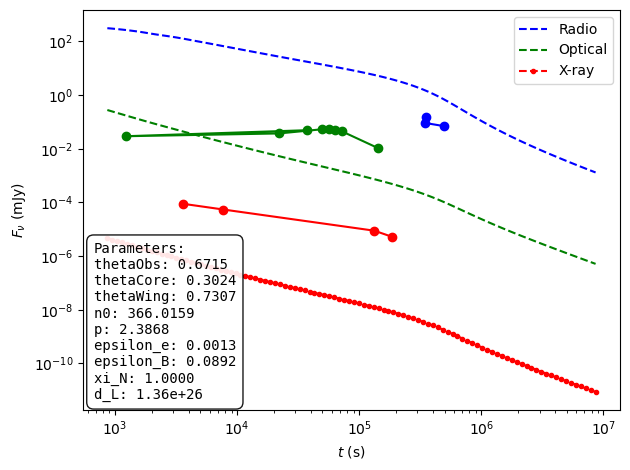

In [ ]:

lc_plot(

E0=10**49.1985,
epsilon_b=10**-1.32523,
epsilon_e=10**-2.83974,
n0=10**2.98148,
thetaCore=0.321656,
thetaObs=0.52621,
thetaWing=0.72061,
p=2.54134,



 observed_data='data/EP250704a_rem_prompt.csv')#final_extinct_corr.csv')
 #lc_plot(thetaCore=0.02, E0=5.11E51, thetaObs=0.065, epsilon_e=0.005, epsilon_b=0.05, observed_data='data/EP250704a_final_extinct_corr.csv')

Calc Radio
Calc Optical
Calc X-ray
Optical Obs data sample: [[3.70040000e+04 4.90259761e-02]
 [1.22400000e+03 2.92702377e-02]
 [2.20529000e+04 3.71900060e-02]
 [4.96480000e+04 5.32630766e-02]
 [5.68080000e+04 5.47553109e-02]]
Observed Data loaded successfully!
Optical observations (i-band): 8 data points
Radio observations: 3 data points
X-ray observations (Swift): 16 data points
Plot
Saving plots/lc_afterflow_obs_matching.pdf


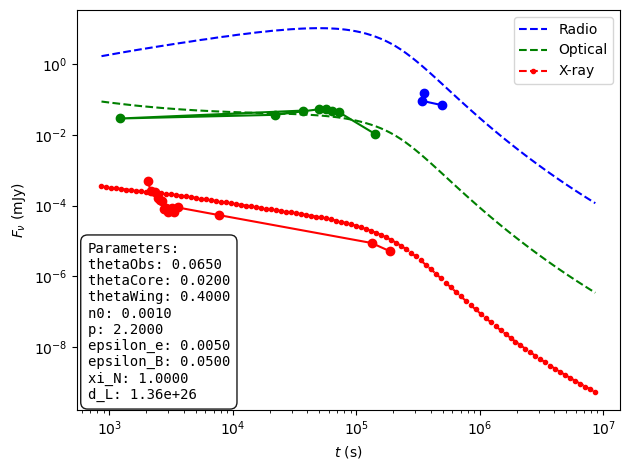

In [ ]:
lc_plot(thetaCore=0.02, E0=5.11E51, thetaObs=0.065, epsilon_e=0.005, epsilon_b=0.05, observed_data='data/EP250704a_final_extinct_corr.csv')

Calc Radio
Calc Optical
Calc X-ray
Optical Obs data sample: [[3.70040000e+04 4.90259761e-02]
 [1.22400000e+03 2.92702377e-02]
 [2.20529000e+04 3.71900060e-02]
 [4.96480000e+04 5.32630766e-02]
 [5.68080000e+04 5.47553109e-02]]
Observed Data loaded successfully!
Optical observations (i-band): 8 data points
Radio observations: 3 data points
X-ray observations (Swift): 16 data points
Plot
Saving plots/lc_afterflow_obs_matching.pdf


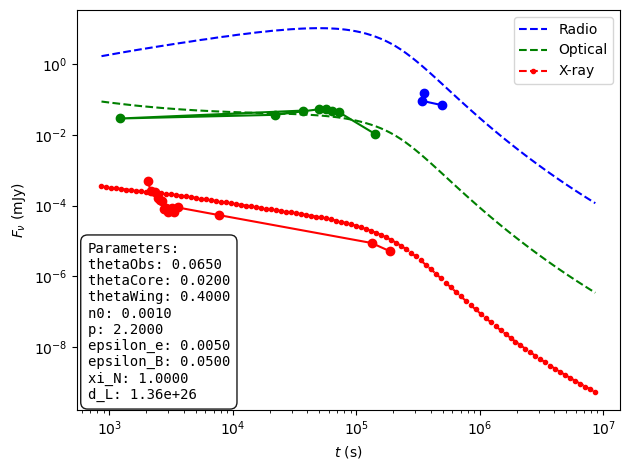

In [ ]:
lc_plot(thetaCore=0.02, E0=5.11E51, thetaObs=0.065, epsilon_e=0.005, epsilon_b=0.05, observed_data='data/EP250704a_final_extinct_corr.csv')

Calc Radio
Calc Optical
Calc X-ray
Optical Obs data sample: [[3.70040000e+04 4.90259761e-02]
 [1.22400000e+03 2.92702377e-02]
 [2.20529000e+04 3.71900060e-02]
 [4.96480000e+04 5.32630766e-02]
 [5.68080000e+04 5.47553109e-02]]
Observed Data loaded successfully!
Optical observations (i-band): 8 data points
Radio observations: 3 data points
X-ray observations (Swift): 16 data points
Plot
Saving plots/lc_afterflow_obs_matching.pdf


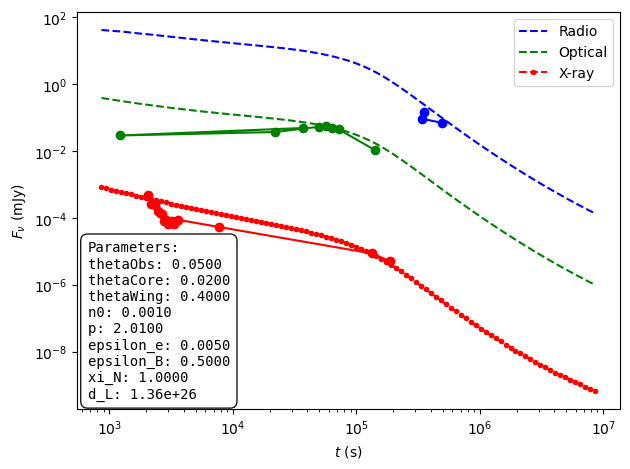

In [ ]:
lc_plot(thetaCore=0.02, E0=5.11E51, thetaObs=0.05, epsilon_e=0.005, epsilon_b=0.5, observed_data='data/EP250704a_final_extinct_corr.csv', p = 2.01)